In [0]:
# Get the dataset
!wget -cq https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip

# Unzip
!unzip -qq ChestXRay2017.zip

In [0]:
!ls

chest_xray  ChestXRay2017.zip  __MACOSX  sample_data


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras import layers
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [0]:
data_dir = 'chest_xray'

train_dir = data_dir + '/train' # Path to train directory
test_dir = data_dir + '/test' # Path to test directory

NORMAL


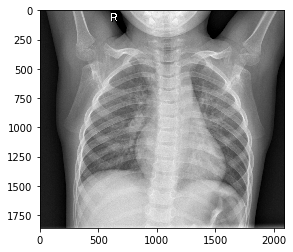

In [0]:
# Display Normal chest x-ray image
img_normal = load_img('chest_xray/train/NORMAL/IM-0115-0001.jpeg')
print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


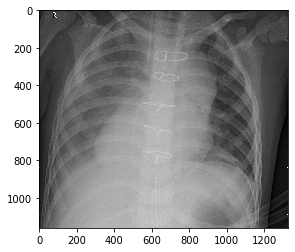

In [0]:
# Display Pneumonia chest x-ray image
img_pneumonia = load_img('chest_xray/train/PNEUMONIA/person2_bacteria_4.jpeg')
print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

In [0]:
# Import VGG19 pre-trained model
vgg_model = VGG19(include_top=True, weights='imagenet')

574717952/574710816 [==============================] - 17s 0us/step


In [0]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# Pop off the last layer
vgg_model.layers.pop()

In [0]:
# Compile the model
predictions = Dense(1, activation='sigmoid')(vgg_model.layers[-1].output)
model = Model(inputs=vgg_model.input, outputs=predictions)

model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# Prepare data augmentation configuration
train_datagen = ImageDataGenerator(rotation_range=40,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    subset='validation')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  batch_size=16,
                                                  class_mode='binary')

Found 4710 images belonging to 2 classes.
Found 522 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
# Number of train and validation steps
train_steps=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

In [0]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, verbose=1, mode='max')

In [0]:
# Train the model
history = model.fit_generator(train_generator,
                    steps_per_epoch=train_steps,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    epochs=20,
                    callbacks=[checkpoint])

Epoch 1/20
294/294 [==============================] - 129s 440ms/step - loss: 0.5597 - acc: 0.7588 - val_loss: 0.2534 - val_acc: 0.8594

Epoch 00001: val_acc improved from -inf to 0.85938, saving model to weights.hdf5
Epoch 2/20
294/294 [==============================] - 123s 418ms/step - loss: 0.2944 - acc: 0.8655 - val_loss: 0.2735 - val_acc: 0.8636

Epoch 00002: val_acc improved from 0.85938 to 0.86364, saving model to weights.hdf5
Epoch 3/20
294/294 [==============================] - 125s 424ms/step - loss: 0.2696 - acc: 0.8844 - val_loss: 0.2501 - val_acc: 0.8933

Epoch 00003: val_acc improved from 0.86364 to 0.89328, saving model to weights.hdf5
Epoch 4/20
294/294 [==============================] - 125s 425ms/step - loss: 0.2518 - acc: 0.8905 - val_loss: 0.2466 - val_acc: 0.8874

Epoch 00004: val_acc did not improve from 0.89328
Epoch 5/20
294/294 [==============================] - 125s 426ms/step - loss: 0.2380 - acc: 0.8980 - val_loss: 0.2149 - val_acc: 0.8834

Epoch 00005: val

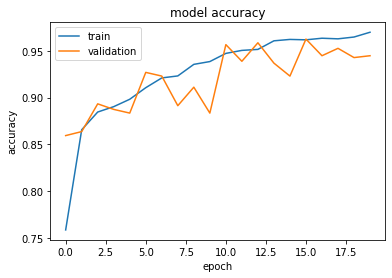

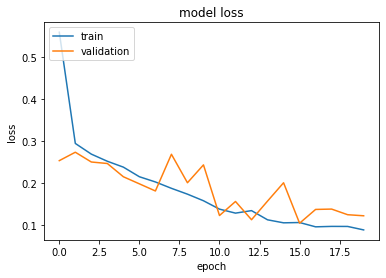

In [0]:
# Plot accuracy and loss graphs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# Test the data
score = model.evaluate_generator(test_generator)

In [0]:
score

[0.4658936753104895, 0.8461538461538461]